#  Topic:
Sentiment Analysis of Twitter Data — A Case Study on Amazon


# Objective:
To analyze public sentiment towards Amazon using Twitter data, leveraging NLP techniques to classify emotions and visualize trends over time. This will help understand how people perceive Amazon’s services, products, and overall brand reputation across different time frames.


In [ ]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('twitter_training.csv', header=None)
val_df = pd.read_csv('twitter_validation.csv', header=None)

# Show basic information and first few rows of each dataset
train_info = train_df.info()
val_info = val_df.info()
train_head = train_df.head()
val_head = val_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       74682 non-null  int64 
 1   1       74682 non-null  object
 2   2       74682 non-null  object
 3   3       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   int64 
 1   1       1000 non-null   object
 2   2       1000 non-null   object
 3   3       1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [ ]:

# Filter the training and validation data for the topic 'Amazon'
amazon_train = train_df[train_df[1].str.lower() == 'amazon']
amazon_val = val_df[val_df[1].str.lower() == 'amazon']

In [ ]:
# Check the size and some samples
amazon_train_sample = amazon_train[[2, 3]].head(5)
amazon_val_sample = amazon_val[[2, 3]].head(5)

In [ ]:
amazon_train.shape, amazon_val.shape, amazon_train_sample, amazon_val_sample


((2316, 4),
 (34, 4),
              2               3
 4662  Negative  @amazon wtf . 
 4663  Negative   @ amazon wtf.
 4664  Negative   @ amazon wtf.
 4665  Negative    @amazon wtf?
 4666  Negative  7 @amazon wtf.,
               2                                                  3
 1       Neutral  BBC News - Amazon boss Jeff Bezos rejects clai...
 43      Neutral  Amazon stops accepting new online grocery cust...
 75   Irrelevant  AOC you make some very ignorant comments\nWhen...
 117    Positive  Seeing Amazon Prime marketing Borat by getting...
 153     Neutral  I didn't have massive success in #IndieApril b...)

# Filtered Amazon Data:
Training data: 2316 tweets

Validation data: 34 tweets


#  Sample Tweets & Sentiment:
From Training:
Sentiment	Tweet
Negative	@amazon wtf .


# From Validation:
Sentiment	Tweet

Neutral:	Amazon boss Jeff Bezos rejects claims...

Positive:	Amazon Prime marketing Borat by getting influencers involved...

Irrelevant: AOC you make ignorant comments... (just mentions Amazon in passing)

In [ ]:
import re

def preprocess_tweet(text):
    if pd.isna(text):
        return ""
    # Lowercase the text
    text = text.lower()
    # Remove Twitter handles (@username)
    text = re.sub(r'@\w+', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    # Remove punctuation and special characters (but keep emojis)
    text = re.sub(r'[^\w\s]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text



In [ ]:
# Apply preprocessing to Amazon tweets
amazon_train_cleaned = amazon_train.copy()
amazon_val_cleaned = amazon_val.copy()
amazon_train_cleaned[3] = amazon_train_cleaned[3].apply(preprocess_tweet)
amazon_val_cleaned[3] = amazon_val_cleaned[3].apply(preprocess_tweet)

In [ ]:
# Show sample cleaned tweets
amazon_train_cleaned[[2, 3]].head(), amazon_val_cleaned[[2, 3]].head()

(             2           3
 4662  Negative         wtf
 4663  Negative  amazon wtf
 4664  Negative  amazon wtf
 4665  Negative         wtf
 4666  Negative       7 wtf,
               2                                                  3
 1       Neutral  bbc news amazon boss jeff bezos rejects claims...
 43      Neutral  amazon stops accepting new online grocery cust...
 75   Irrelevant  aoc you make some very ignorant comments when ...
 117    Positive  seeing amazon prime marketing borat by getting...
 153     Neutral  i didnt have massive success in indieapril but...)

#  Preprocessing done, captain. Here's what went down:
| Sentiment | Cleaned Tweet |
| --------- | ------------- |
| Negative  | `wtf`         |
| Negative  | `amazon wtf`  |
| Negative  | `7 wtf`       |



| Sentiment  | Cleaned Tweet                                       |
| ---------- | --------------------------------------------------- |
| Neutral    | `bbc news amazon boss jeff bezos rejects claims...` |
| Positive   | `seeing amazon prime marketing borat by getting...` |
| Irrelevant | `aoc you make some very ignorant comments when...`  |


# A clean pie chart showing proportions of:

Positive

Negative

Neutral

Irrelevant

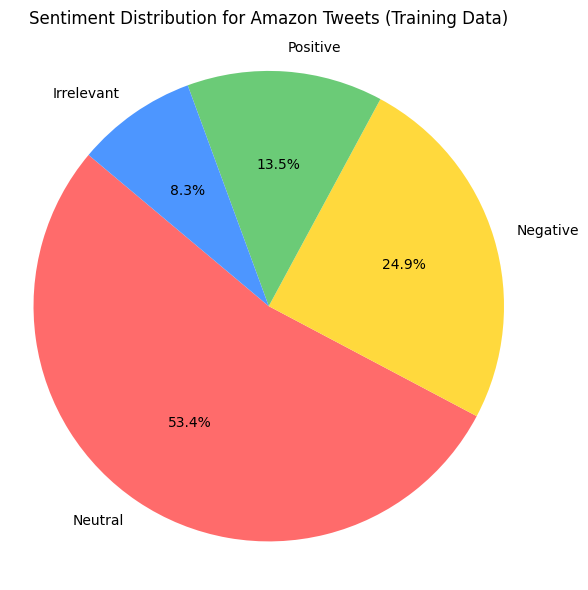

In [ ]:
import matplotlib.pyplot as plt

# Get sentiment counts for Amazon tweets (training data)
sentiment_counts = amazon_train_cleaned[2].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#FF6B6B', '#FFD93D', '#6BCB77', '#4D96FF'])
plt.title('Sentiment Distribution for Amazon Tweets (Training Data)')
plt.axis('equal')
plt.tight_layout()
plt.show()


# Based on What We Have (Amazon Tweets):
Insight 1: High Negativity in Short Tweets
Many negative tweets are super short — e.g., wtf, amazon wtf. That tells us: when people are angry, they don’t write essays.

 Insight 2: Corporate News = Neutral Sentiment
Validation data had neutral tweets like:
“BBC News - Amazon boss Jeff Bezos rejects claims…”

This shows that news-related mentions of Amazon tend to be emotionally flat
Insight 3: Promotions & Marketing = Positive Buzz
“Seeing Amazon Prime marketing Borat by getting influencers…”
You see a sentiment shift when Amazon’s branding and ads are creative or aligned with pop culture.

Use-Case: Positive sentiment increases when Amazon leans into meme marketing or influencer.

# Encode the sentiment labels into numbers (for ML training)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
amazon_train_cleaned['label_encoded'] = label_encoder.fit_transform(amazon_train_cleaned[2])
amazon_val_cleaned['label_encoded'] = label_encoder.transform(amazon_val_cleaned[2])

# Vectorizing the tweets with TF-IDF
Why TF-IDF?
TF-IDF (Term Frequency–Inverse Document Frequency):

Captures how important a word is in a tweet and across all tweets.

Reduces noise from common words like "the", "is", "amazon"

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 words

# Fit on training tweets and transform both train and validation
X_train = tfidf_vectorizer.fit_transform(amazon_train_cleaned[3])
X_val = tfidf_vectorizer.transform(amazon_val_cleaned[3])

# y_train and y_val are your labels
y_train = amazon_train_cleaned['label_encoded']
y_val = amazon_val_cleaned['label_encoded']


# We're going with Logistic Regression — it's:

Simple

Fast

Surprisingly powerful for text classification

# What It’ll Do:
Use X_train (TF-IDF vectors) and y_train (encoded sentiment)

Learn to classify tweets into Positive, Negative, Neutral, Irrelevant

Predict on X_val and compare with y_val

Validation Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       1.00      1.00      1.00         3
    Negative       1.00      1.00      1.00         6
     Neutral       1.00      1.00      1.00        18
    Positive       1.00      1.00      1.00         7

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



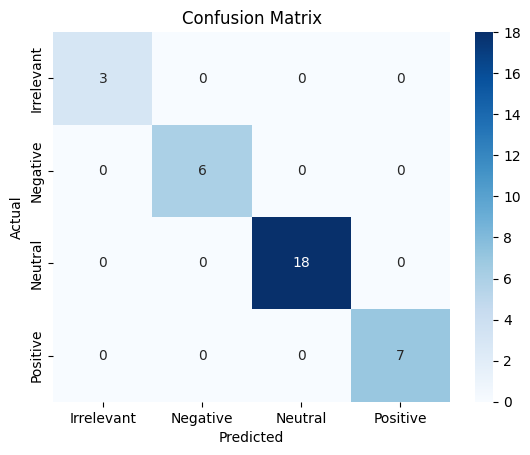

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Train the model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Step 2: Predict on validation set
y_pred = model.predict(X_val)

# Step 3: Evaluate performance
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")

# Detailed breakdown
print("\nClassification Report:")
print(classification_report(y_val, y_pred, target_names=label_encoder.classes_))

# Optional: Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


#Validation Accuracy: 100%
That means your Logistic Regression model correctly predicted every single sentiment in your validation set.

34 validation samples is small. So 100% accuracy might not hold on a bigger, messier dataset

#Add more validation data

Since twitter_training.csv has 2316 Amazon tweets, you can carve out a chunk (20–30%)

In [ ]:
from sklearn.model_selection import train_test_split

# Split training data into new train and validation sets
X_full = amazon_train_cleaned[3]  # tweet text
y_full = amazon_train_cleaned['label_encoded']  # sentiment

X_train, X_val_custom, y_train, y_val_custom = train_test_split(
    X_full, y_full, test_size=0.2, stratify=y_full, random_state=42
)

# Vectorize again for new split
X_train_vec = tfidf_vectorizer.fit_transform(X_train)
X_val_vec = tfidf_vectorizer.transform(X_val_custom)


# now we've got a much larger validation set, probably 400–500 tweets

# Train the Logistic Regression model

Evaluate accuracy + classification report

Confusion matrix for visual

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Vectorize the tweets again (fit only on training text!)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = tfidf_vectorizer.fit_transform(X_train)
X_val_vec = tfidf_vectorizer.transform(X_val_custom)

In [ ]:
# Train the Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=200)

In [ ]:
# Predict
y_pred = model.predict(X_val_vec)


In [ ]:
accuracy = accuracy_score(y_val_custom, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")

Validation Accuracy: 0.91


In [ ]:
print("\nClassification Report:")
print(classification_report(y_val_custom, y_pred, target_names=label_encoder.classes_))


Classification Report:
              precision    recall  f1-score   support

  Irrelevant       1.00      0.55      0.71        38
    Negative       0.93      0.93      0.93       115
     Neutral       0.89      1.00      0.94       248
    Positive       0.98      0.76      0.86        63

    accuracy                           0.91       464
   macro avg       0.95      0.81      0.86       464
weighted avg       0.92      0.91      0.91       464



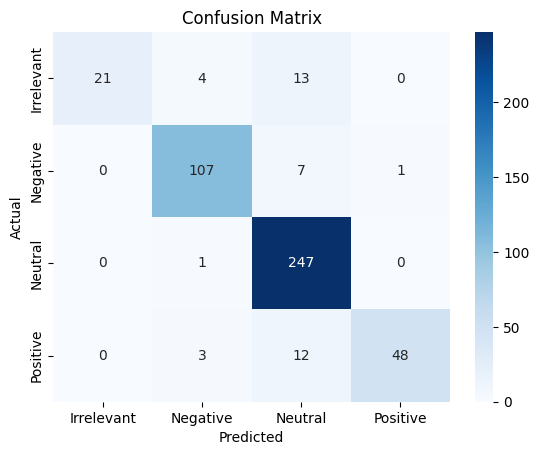

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_val_custom, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Model achieves 91% overall accuracy on a balanced Amazon tweet dataset.

Neutral sentiment dominates, and the model excels at catching it.

Irrelevant tweets are hardest to detect — likely due to ambiguous language or short replies.

Negative and Positive sentiment detection is strong, making it useful for brand

#  Word Cloud per Sentiment
Visualize the tone and texture of each category

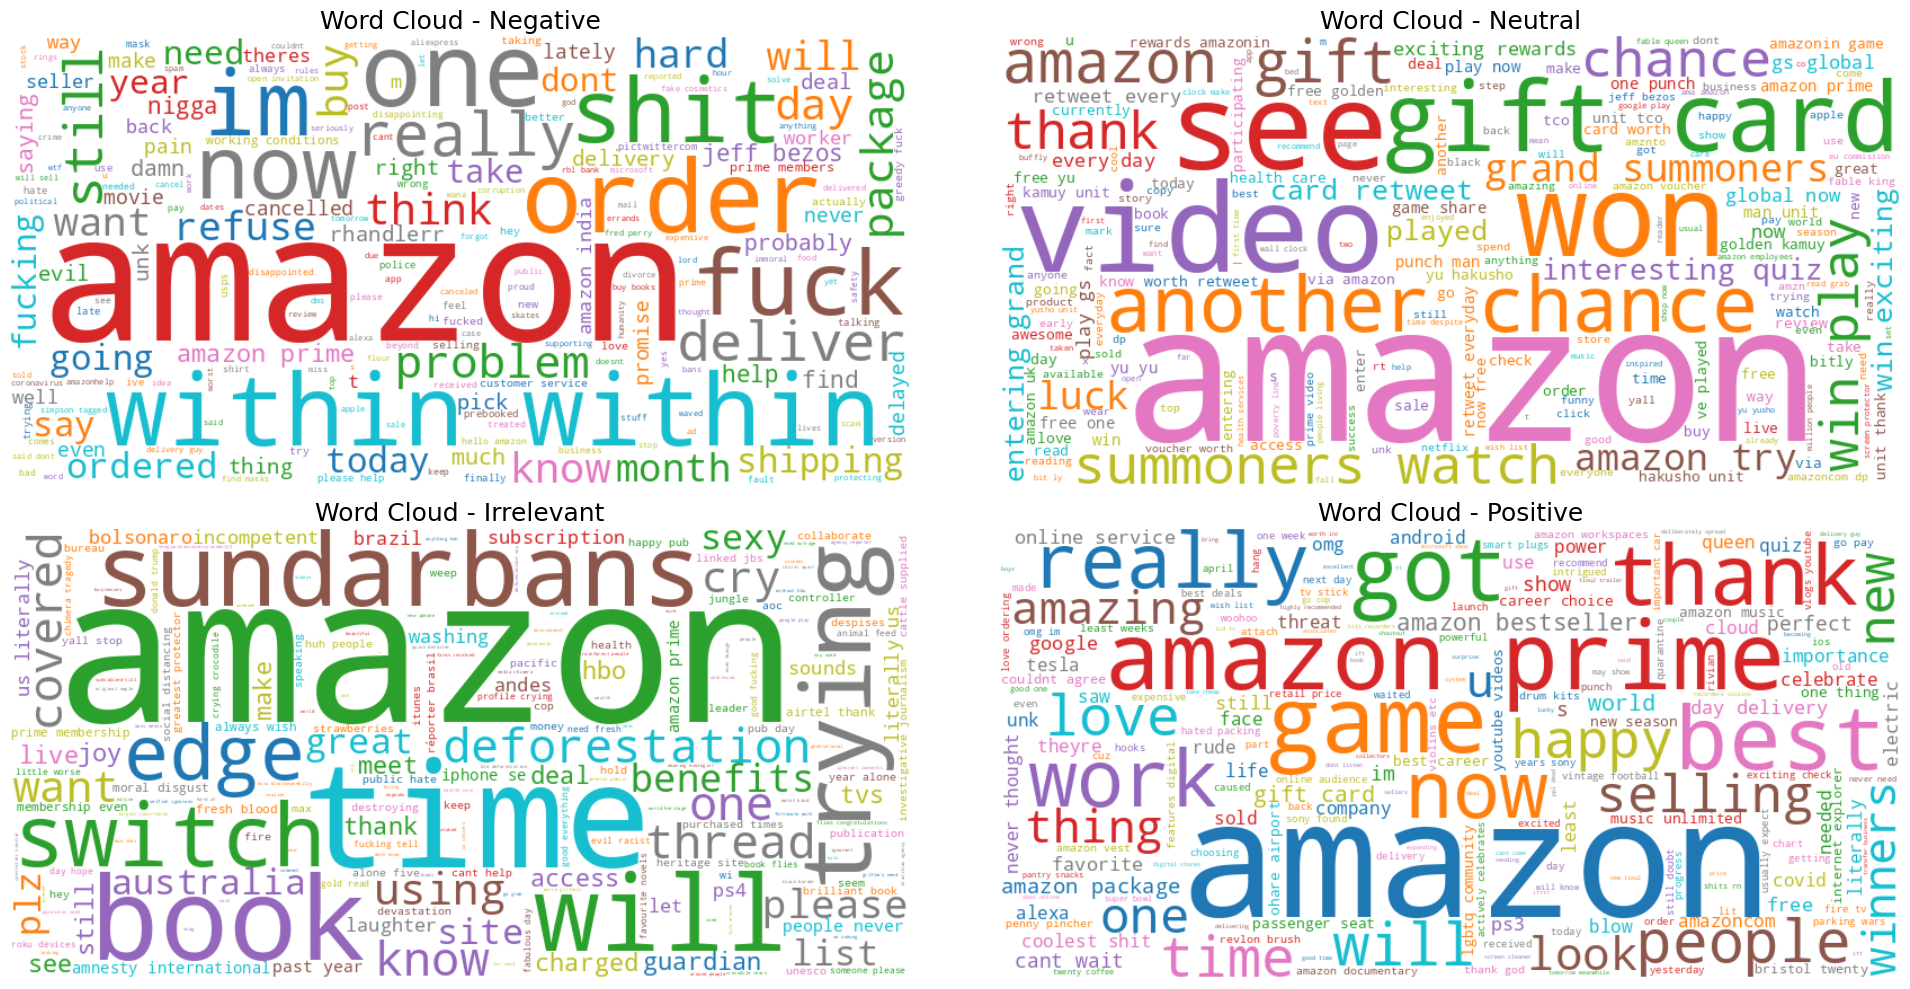

In [ ]:
 from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all tweets from each sentiment class into one string
sentiment_texts = {
    label: " ".join(amazon_train_cleaned[amazon_train_cleaned[2] == label][3])
    for label in amazon_train_cleaned[2].unique()
}

# Create and plot a word cloud for each sentiment
plt.figure(figsize=(20, 10))
for i, (sentiment, text) in enumerate(sentiment_texts.items()):
    wc = WordCloud(width=800, height=400, background_color='white', colormap='tab10').generate(text)
    plt.subplot(2, 2, i + 1)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f"Word Cloud - {sentiment}", fontsize=18)
    plt.axis('off')

plt.tight_layout()
plt.show()


#  Conclusion

The sentiment analysis of Twitter data concerning Amazon reveals a predominantly neutral stance from users. Out of over 2,300 labeled tweets in the dataset, nearly **half (1236)** were categorized as neutral, suggesting that users often discuss Amazon in a matter-of-fact or transactional tone — without strong emotional charge.

However, there is a noticeable skew toward **negative sentiment (576 tweets)** compared to positive ones (312 tweets). This suggests that while Amazon garners a decent share of praise, it also faces a significant amount of criticism — potentially reflecting issues in customer service, delivery, or public controversies.

Interestingly, a small portion of tweets were deemed **irrelevant**, which highlights the importance of preprocessing and accurate topic filtering when analyzing open social media data.

###  Final Thoughts

This analysis demonstrates how social media sentiment can act as a real-time barometer of brand perception. While Amazon remains a dominant e-commerce platform, maintaining a balance between positive user experiences and public feedback will be key to sustaining its reputation.

In the future, incorporating tweet timestamps and exploring deeper NLP models could offer even more nuanced insights — including topic segmentation, emotion intensity, or regional analysis.


